In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from scipy.stats import zscore 

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Apziva/Project2_TermDepositM/ProjectData/term-deposit-marketing-2020.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
data.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [5]:
data['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

# EDA

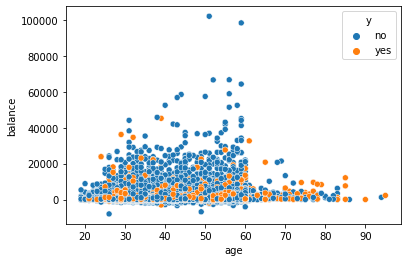

In [ ]:
#lets look at how some of these features may influence the target variable.
sns.scatterplot(x="age",y="balance",hue="y",data=data)
plt.show()

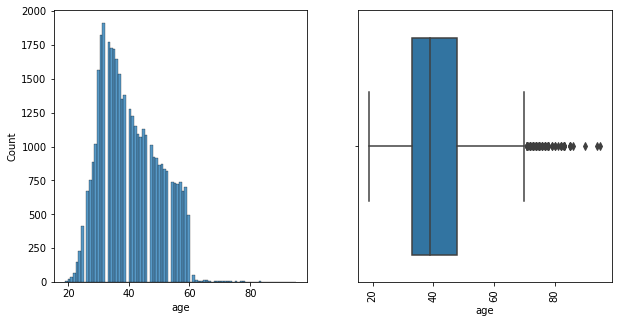

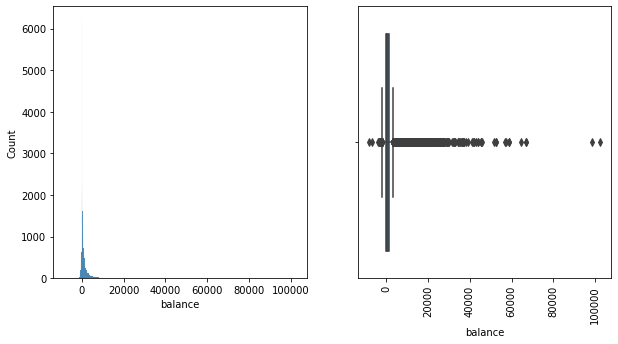

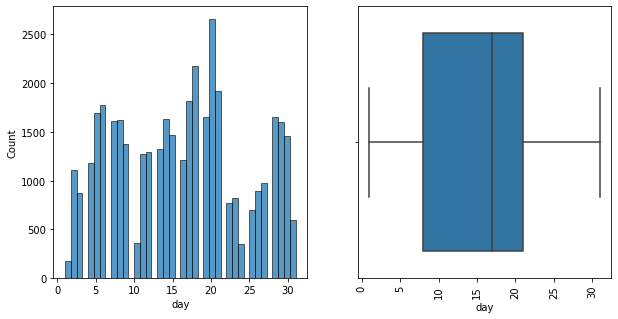

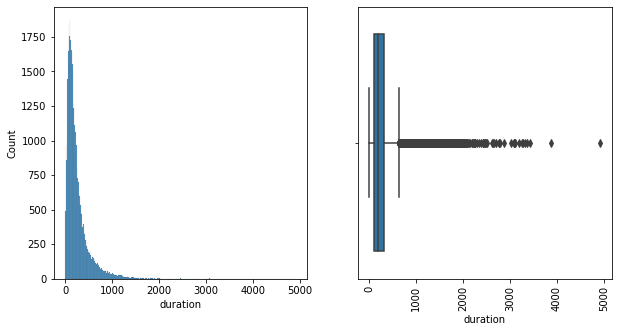

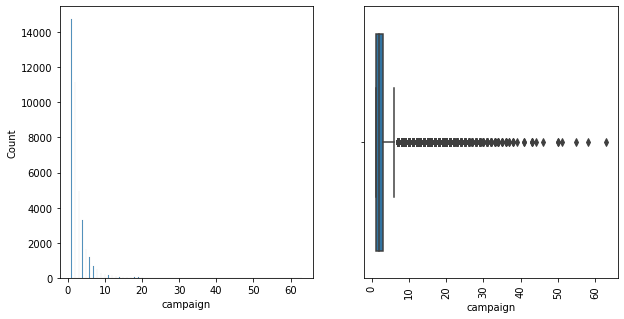

In [ ]:
numerical_data = ['age', 'balance', 'day', 'duration', 'campaign']

for attribute in numerical_data:
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    sns.histplot(data=data, x=data[attribute], ax=ax[0])
    sns.boxplot(data=data, x=data[attribute], ax=ax[1])
    plt.xticks(rotation=90)
    plt.show()

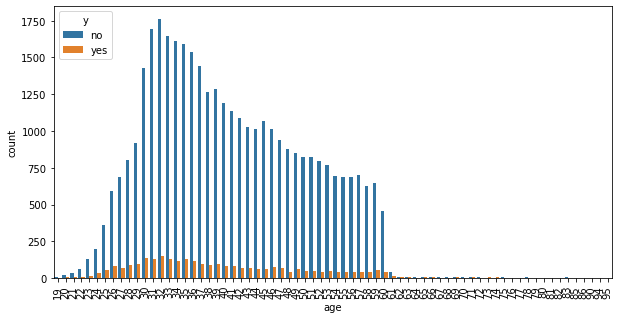

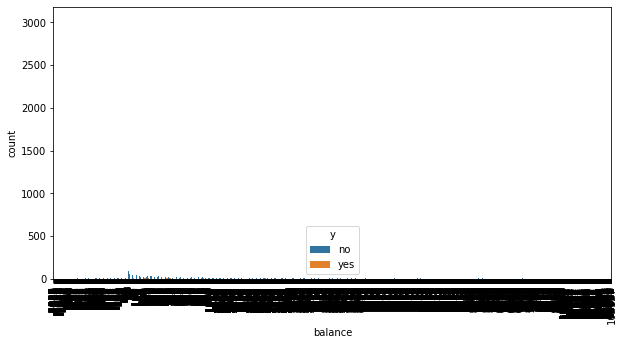

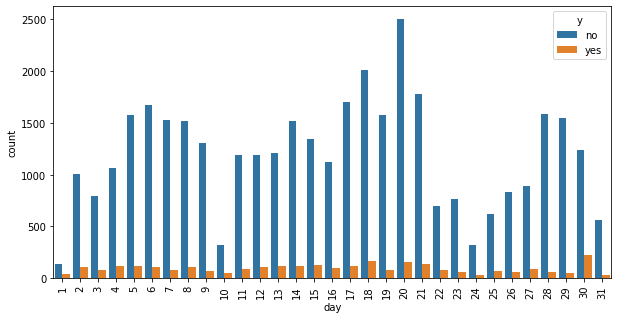

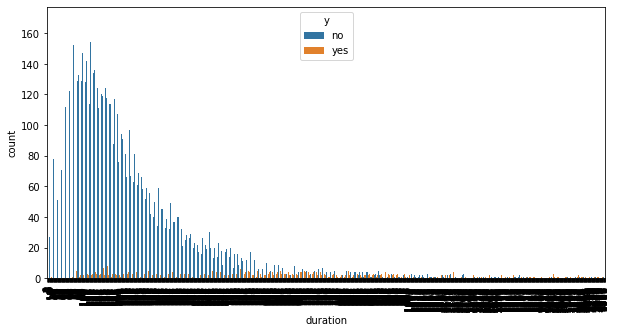

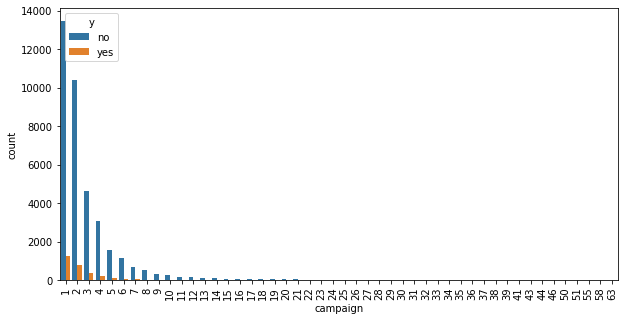

In [ ]:
numerical_data = ['age', 'balance', 'day', 'duration', 'campaign']


for ind,attribute in enumerate(numerical_data): 
    fig, ax = plt.subplots(1, figsize=(10,5))
    sns.countplot(x=attribute,hue="y",data=data,ax=ax)
    plt.xticks(rotation=90)
    plt.show()

# Note: LLets look at the features individually to get a better understanding 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


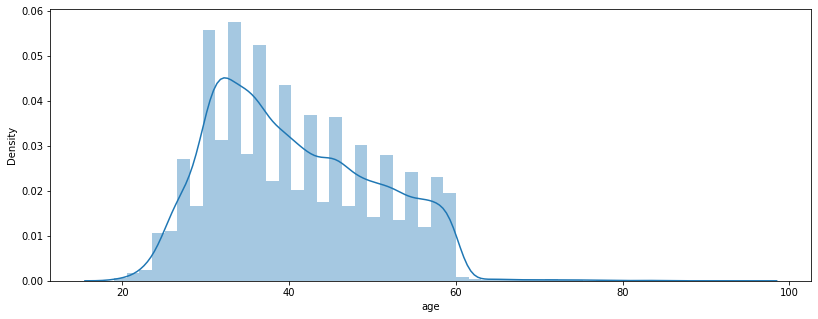

count    40000.000000
mean        40.544600
std          9.641776
min         19.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


' \nplt.subplot(122)\ndata["age"].plot.box(figsize=(16,5))\nplt.show()\nprint(data[\'age\'].describe())\n\n'

In [ ]:
plt.figure(1,figsize=(30,5))
plt.subplot(121)
sns.distplot(data["age"]);
plt.show()
print(data['age'].describe())
""" 
plt.subplot(122)
data["age"].plot.box(figsize=(16,5))
plt.show()
print(data['age'].describe())

"""

# Note : The minimum age in the data is 40. there is an outlier from age above 60 to till age 95.

blue-collar      0.234575
management       0.204150
technician       0.171300
admin            0.112075
services         0.097750
retired          0.035925
self-employed    0.035350
entrepreneur     0.035125
unemployed       0.027600
housemaid        0.027175
student          0.013100
unknown          0.005875
Name: job, dtype: float64


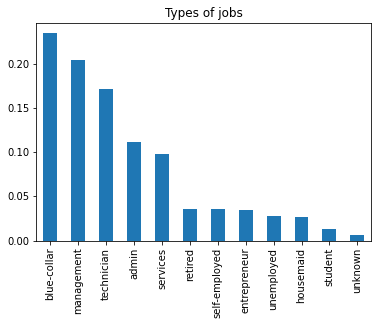

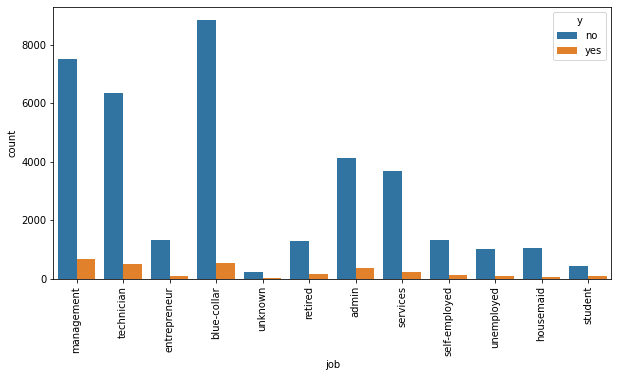

In [ ]:
print(data["job"].value_counts(normalize=True))
data["job"].value_counts(normalize=True).plot.bar(title="Types of jobs")

fig, ax = plt.subplots(1, figsize=(10,5))
sns.countplot(x="job",hue="y",data=data,ax=ax)
plt.xticks(rotation=90)
plt.show()

# Note: Top three jobs in the data are blue-collar, management and technician who are most likely to subscirbe the service

secondary    0.524825
tertiary     0.280150
primary      0.156750
unknown      0.038275
Name: education, dtype: float64


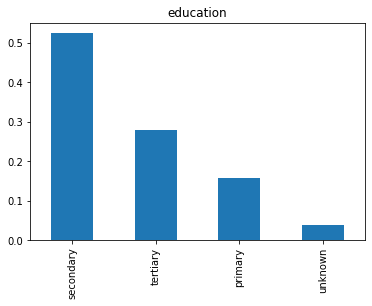

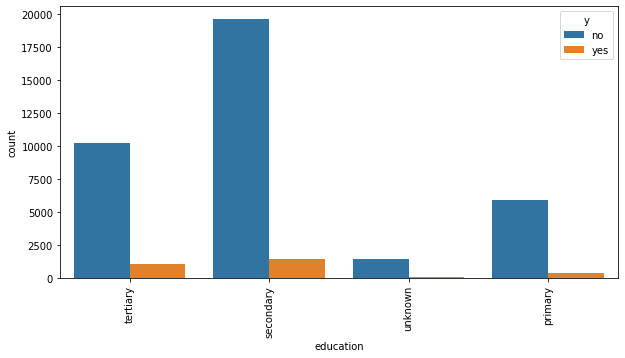

In [ ]:
print(data["education"].value_counts(normalize=True))
data["education"].value_counts(normalize=True).plot.bar(title="education")

fig, ax = plt.subplots(1, figsize=(10,5))
sns.countplot(x="education",hue="y",data=data,ax=ax)
plt.xticks(rotation=90)
plt.show()

# Note: Most of the users who subscribed to the term deposit had a secodnary level education

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


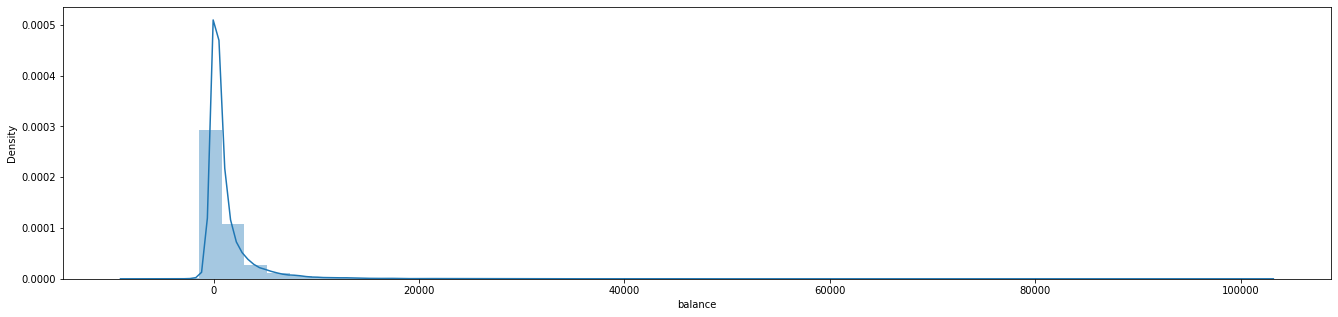

In [ ]:
plt.figure(1,figsize=(50,5))
plt.subplot(121)
sns.distplot(data["balance"]);



# Looks like there is an outlier in the balance data for balance above 15000 

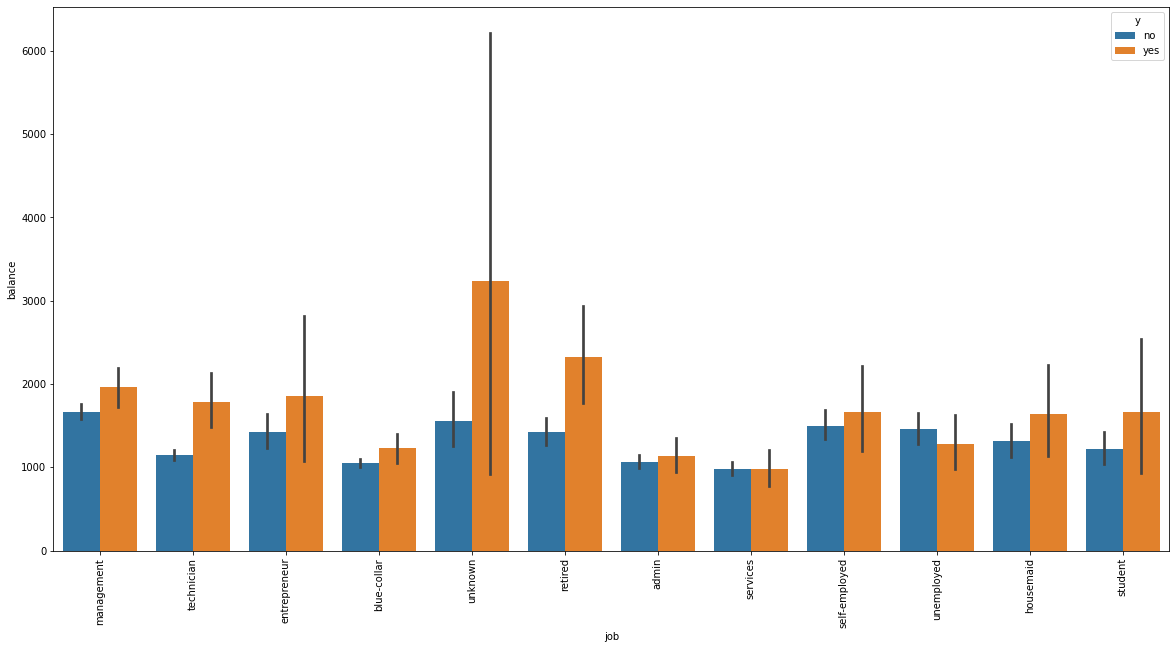

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))
sns.barplot(x="job",y='balance', hue="y",data=data,ax=ax)
plt.xticks(rotation=90)
plt.show()

yes    0.600775
no     0.399225
Name: housing, dtype: float64


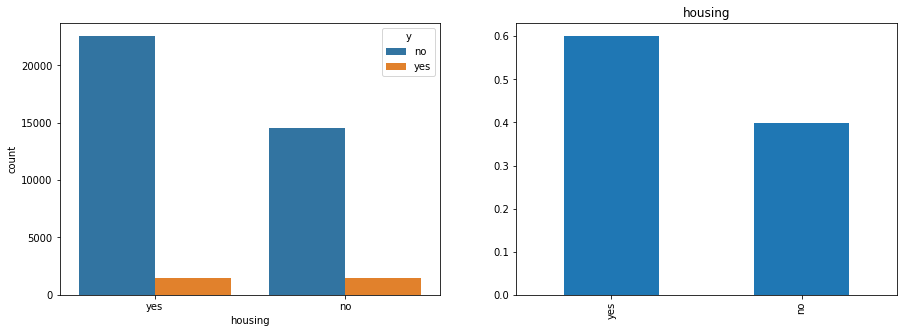

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
print(data["housing"].value_counts(normalize=True))
data["housing"].value_counts(normalize=True).plot.bar(title="housing",ax=ax[1])

sns.countplot(x="housing",hue="y",data=data,ax=ax[0])
plt.xticks(rotation=90)
plt.show()

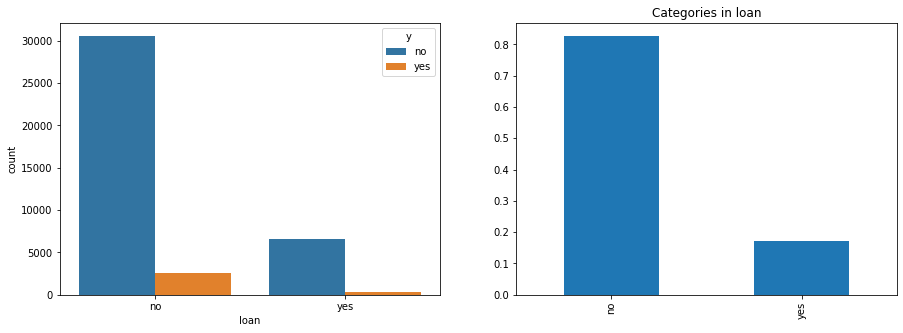

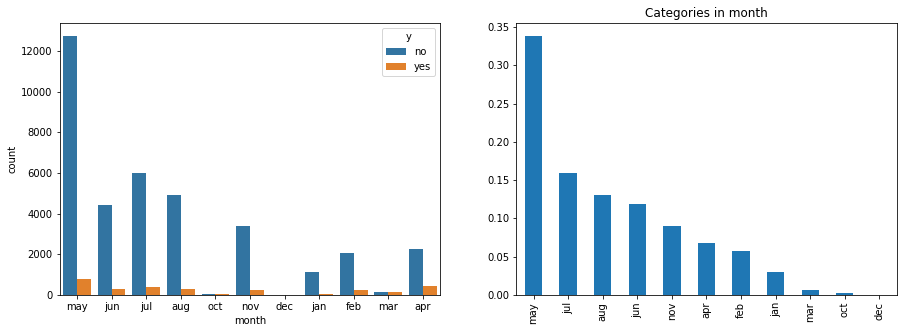

In [ ]:
features=['loan','month']
for columns in features:
  fig, ax = plt.subplots(1,2, figsize=(15,5))
  #print(data[columns].value_counts(normalize=True))
  data[columns].value_counts(normalize=True).plot.bar(title="Categories in "+columns,ax=ax[1])
  sns.countplot(x=columns,hue="y",data=data,ax=ax[0])
  plt.xticks(rotation=90)
  plt.show()


# Data Preprocessing

In [5]:
df1=data.copy()

In [6]:
dfNew=data.copy()

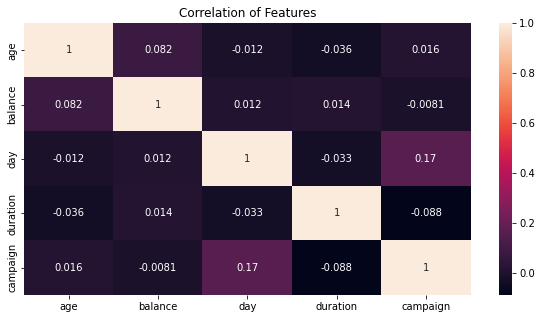

In [8]:
plt.subplots(figsize=(10,5))
plt.title('Correlation of Features')
sns.heatmap(dfNew.corr(), annot=True)
plt.show()

# Covert the months into its corresponding numbers

In [7]:
#Convert months to numeric values
dfNew.month=dfNew.month.replace({"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12})

In [34]:
dfNew[0:4]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,no


# convert some columns that has yes or no as the value

In [8]:
columnsWith_BinaryLabel = ['default', 'housing', 'loan', 'y']
for col in columnsWith_BinaryLabel:
    dfNew[col] = dfNew[col].map({'yes': 1, 'no': 0})
dfNew[0:4]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,0


In [9]:
df_Numerical_BinaryCategorical=dfNew[['age', 'balance', 'duration', 'campaign','default', 'housing', 'loan', 'y']]

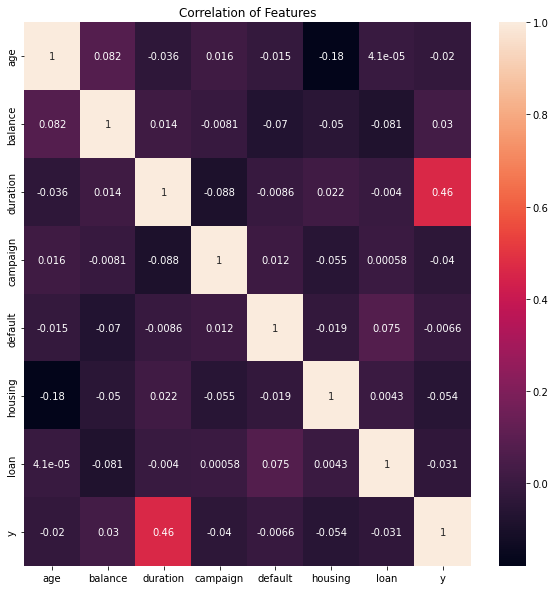

In [ ]:
plt.subplots(figsize=(10,10))
plt.title('Correlation of Features')
sns.heatmap(df_Numerical_BinaryCategorical.corr(), annot=True)
plt.show()

# lets rescale the data values in numerical categories with scikit learn in range between -1 to 1

In [10]:
numerical_categories = ['age', 'balance', 'duration', 'campaign','day','month']
for cats in numerical_categories:
    scaler = StandardScaler().fit(dfNew[cats].values.reshape(-1, 1))
    dfNew[cats] = scaler.transform(dfNew[cats].values.reshape(-1, 1))
dfNew[0:4]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,1.810415,management,married,tertiary,0,0.299174,1,0,unknown,-1.3309,-0.43884,0.023811,-0.581096,0
1,0.358382,technician,single,secondary,0,-0.428854,1,0,unknown,-1.3309,-0.43884,-0.400305,-0.581096,0
2,-0.782501,entrepreneur,married,secondary,0,-0.438152,1,1,unknown,-1.3309,-0.43884,-0.689474,-0.581096,0
3,0.669532,blue-collar,married,unknown,0,0.079802,1,0,unknown,-1.3309,-0.43884,-0.627785,-0.581096,0


# Now the categorical features that does not have binary labels(yes/no) need to be represeted as a numerical label instead of categories

In [11]:
multi_Category_Features=['job', 'marital', 'education', 'contact']
dfNew = pd.get_dummies(data=dfNew, columns=multi_Category_Features)

In [39]:
dfNew[0:3]

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,1.810415,0,0.299174,1,0,-1.3309,-0.43884,0.023811,-0.581096,0,...,0,1,0,0,0,1,0,0,0,1
1,0.358382,0,-0.428854,1,0,-1.3309,-0.43884,-0.400305,-0.581096,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.782501,0,-0.438152,1,1,-1.3309,-0.43884,-0.689474,-0.581096,0,...,0,1,0,0,1,0,0,0,0,1


In [16]:
df1[0:9]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no


In [12]:
df_cleaned=dfNew.copy()

# Model 

In [13]:
all_data = df_cleaned.loc[:, df_cleaned.columns != 'y']
all_label = df_cleaned['y']

In [14]:
from sklearn.model_selection import train_test_split, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [15]:
trainData, testData, trainLabel, testLabel = train_test_split(all_data,all_label, test_size=0.15, stratify=all_label)
print("Train Set:",trainData.shape)
print("Test Set:",testData.shape)

Train Set: (34000, 31)
Test Set: (6000, 31)


In [ ]:
from xgboost.sklearn import XGBClassifier

In [16]:
RANDOM_SEED = 8

In [ ]:
model_xgb=XGBClassifier(seed=RANDOM_SEED, class_weight='balanced',scoring=metrics, cv=5)

In [ ]:
metrics=['roc_auc', 'f1', 'accuracy', 'balanced_accuracy', 'precision', 'recall']

In [ ]:
#modelTest=model_xgb.fit(trainData, trainLabel)
result= cross_validate(model_xgb, trainData, trainLabel, cv=5, scoring=metrics)

In [ ]:
model_xgb.fit(trainData, trainLabel)

XGBClassifier(class_weight='balanced', seed=8)

In [ ]:
predict_Label=model_xgb.predict(testData)
print(classification_report(testLabel, predict_Label))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5566
           1       0.64      0.31      0.42       434

    accuracy                           0.94      6000
   macro avg       0.80      0.65      0.69      6000
weighted avg       0.93      0.94      0.93      6000



In [ ]:
# save in text format
model_xgb.save_model("model_xgb.txt")

In [ ]:
# save in JSON format
model_xgb.save_model("model_sklearn.json")

In [24]:
import catboost

In [25]:
from catboost import CatBoostClassifier

## Handling Data Imbalance 

In [19]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [21]:
seed=42
oversampled = RandomOverSampler(random_state = seed)
X_oversampled, y_oversampled = oversampled.fit_resample(trainData, trainLabel)   

In [ ]:
# check sampling distribution
pd.value_counts(y_oversampled) 

0    31538
1    31538
Name: y, dtype: int64

## Retrain Model

In [ ]:
#modelTest=model_xgb.fit(trainData, trainLabel)
result= cross_validate(model_xgb, X_oversampled, y_oversampled, cv=5, scoring=metrics)

In [ ]:
model_xgb.fit(X_oversampled, y_oversampled)

XGBClassifier(class_weight='balanced', cv=5,
              scoring=['roc_auc', 'f1', 'accuracy', 'balanced_accuracy',
                       'precision', 'recall'],
              seed=8)

In [ ]:
predict_Label=model_xgb.predict(testData)
print(classification_report(testLabel, predict_Label))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      5566
           1       0.32      0.90      0.47       434

    accuracy                           0.85      6000
   macro avg       0.66      0.88      0.69      6000
weighted avg       0.94      0.85      0.88      6000



## Try downsampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampled = RandomUnderSampler(random_state = seed)
X_undersampled, y_undersampled = undersampled.fit_resample(trainData, trainLabel)   

In [ ]:
# check sampling distribution
pd.value_counts(y_undersampled)

0    2462
1    2462
Name: y, dtype: int64

## Retrain Model

In [ ]:
model_xgbNew=XGBClassifier(seed=RANDOM_SEED, class_weight='balanced',scoring=metrics, cv=5)

In [ ]:
model_xgb2=model_xgbNew.fit(X_undersampled, y_undersampled)

In [ ]:
predict_Label2=model_xgb2.predict(testData)
print(classification_report(testLabel, predict_Label2))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      5566
           1       0.33      0.90      0.48       434

    accuracy                           0.86      6000
   macro avg       0.66      0.88      0.70      6000
weighted avg       0.94      0.86      0.89      6000



In [ ]:
predict_probabilty2=model_xgb2.predict_proba(testData)

In [ ]:
postiveClassPreds=predict_probabilty2[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(testLabel, postiveClassPreds)
print(auc)

0.9367317783580692


### Threshold

## Try SMOTE

In [22]:
smote = SMOTE(random_state = seed)
X_smote, y_smote = smote.fit_resample(trainData, trainLabel)

## Retrain Model with SMOTE data

In [ ]:
model_xgbNew2=XGBClassifier(seed=RANDOM_SEED, class_weight='balanced',scoring=metrics, cv=5)

In [ ]:
model_xgb3=model_xgbNew2.fit(X_smote, y_smote)

In [ ]:
predict_Label3=model_xgb3.predict(testData)
print(classification_report(testLabel, predict_Label3))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5566
           1       0.40      0.81      0.54       434

    accuracy                           0.90      6000
   macro avg       0.69      0.86      0.74      6000
weighted avg       0.94      0.90      0.91      6000



In [ ]:
predict_probabilty3=model_xgb3.predict_proba(testData)
postiveClassPreds3=predict_probabilty3[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(testLabel, postiveClassPreds3)
print(auc)

0.9320500040568891


### Note:
The result improved with SMOTE

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_xgb3, X_smote, y_smote, cv=5)

array([0.89671845, 0.93682124, 0.93246136, 0.93135157, 0.93705906])

## Trying Catboost Model

In [23]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.5 MB/s 


In [26]:
import catboost
from catboost import CatBoostClassifier

In [27]:
model_catBoost=CatBoostClassifier()

In [ ]:
model_catBst=model_catBoost.fit(X_smote, y_smote)

Learning rate set to 0.060461
0:	learn: 0.6377490	total: 67.9ms	remaining: 1m 7s
1:	learn: 0.5977807	total: 86.6ms	remaining: 43.2s
2:	learn: 0.5632780	total: 104ms	remaining: 34.6s
3:	learn: 0.5288079	total: 124ms	remaining: 30.9s
4:	learn: 0.5029266	total: 142ms	remaining: 28.3s
5:	learn: 0.4796945	total: 175ms	remaining: 29s
6:	learn: 0.4378317	total: 207ms	remaining: 29.3s
7:	learn: 0.4135717	total: 229ms	remaining: 28.4s
8:	learn: 0.3971609	total: 249ms	remaining: 27.4s
9:	learn: 0.3842058	total: 269ms	remaining: 26.7s
10:	learn: 0.3702013	total: 293ms	remaining: 26.3s
11:	learn: 0.3535907	total: 327ms	remaining: 26.9s
12:	learn: 0.3418292	total: 347ms	remaining: 26.3s
13:	learn: 0.3310591	total: 375ms	remaining: 26.4s
14:	learn: 0.3122446	total: 397ms	remaining: 26.1s
15:	learn: 0.2989200	total: 425ms	remaining: 26.2s
16:	learn: 0.2921782	total: 447ms	remaining: 25.8s
17:	learn: 0.2864025	total: 470ms	remaining: 25.6s
18:	learn: 0.2827950	total: 491ms	remaining: 25.3s
19:	learn: 

In [ ]:
predict_Label5=model_catBst.predict(testData)
print(classification_report(testLabel, predict_Label5))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5566
           1       0.55      0.50      0.53       434

    accuracy                           0.93      6000
   macro avg       0.76      0.74      0.75      6000
weighted avg       0.93      0.93      0.93      6000



In [77]:
cross_val_score(model_catBoost, X_smote, y_smote, cv=5)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4963608	total: 132ms	remaining: 26.2s
5:	learn: 0.4751339	total: 156ms	remaining: 25.8s
6:	learn: 0.4491133	total: 170ms	remaining: 24.2s
7:	learn: 0.4268177	total: 206ms	remaining: 25.5s
8:	learn: 0.4084384	total: 221ms	remaining: 24.3s
9:	learn: 0.3898926	total: 236ms	remaining: 23.4s
10:	learn: 0.3688426	total: 252ms	remaining: 22.6s
11:	learn: 0.3555349	total: 278ms	remaining: 22.9s
12:	learn: 0.3464518	total: 293ms	remaining: 22.2s
13:	learn: 0.3265650	total: 322ms	remaining: 22.7s
14:	learn: 0.3104160	total: 340ms	remaining: 22.3s
15:	learn: 0.3008032	total: 355ms	remaining: 21.9s
16:	learn: 0.2954725	total: 372ms	remaining: 21.5s
17:	learn: 0.2877542	total: 388ms	remaining: 21.2s
18:	learn: 0.2771870	total: 415ms	remaining: 21.4s
19:	learn: 0.2729526	total: 434ms	remaining: 21.3s
20:	learn: 0.2690942	total: 457ms	remaining: 21.3s
21:	learn: 0.2611189	total: 472ms	remaining: 21s
22:	learn: 0.2562108	total: 487ms	remai

array([0.82997781, 0.97843837, 0.97851764, 0.97360285, 0.97764566])

In [79]:
model_catBst=model_catBoost.fit(X_smote, y_smote,use_best_model=True)

Learning rate set to 0.060461
0:	learn: 0.6388799	total: 180ms	remaining: 2m 59s
1:	learn: 0.5977730	total: 359ms	remaining: 2m 59s
2:	learn: 0.5624400	total: 455ms	remaining: 2m 31s
3:	learn: 0.5268948	total: 583ms	remaining: 2m 25s
4:	learn: 0.4973953	total: 736ms	remaining: 2m 26s
5:	learn: 0.4616007	total: 892ms	remaining: 2m 27s
6:	learn: 0.4380318	total: 1.04s	remaining: 2m 28s
7:	learn: 0.4185757	total: 1.15s	remaining: 2m 22s
8:	learn: 0.4020280	total: 1.23s	remaining: 2m 15s
9:	learn: 0.3852682	total: 1.31s	remaining: 2m 9s
10:	learn: 0.3752123	total: 1.38s	remaining: 2m 3s
11:	learn: 0.3649972	total: 1.47s	remaining: 2m 1s
12:	learn: 0.3533389	total: 1.53s	remaining: 1m 56s
13:	learn: 0.3428483	total: 1.59s	remaining: 1m 52s
14:	learn: 0.3282000	total: 1.66s	remaining: 1m 48s
15:	learn: 0.3167248	total: 1.71s	remaining: 1m 45s
16:	learn: 0.3114661	total: 1.77s	remaining: 1m 42s
17:	learn: 0.3060934	total: 1.83s	remaining: 1m 39s
18:	learn: 0.2916523	total: 1.91s	remaining: 1m

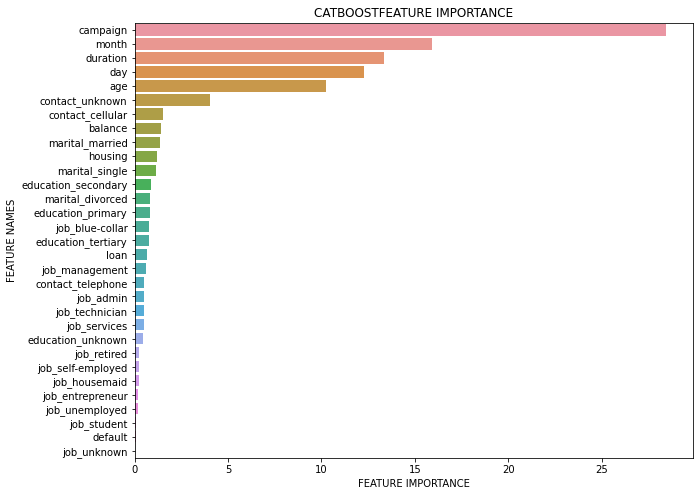

In [32]:
def plot_feature_importance(importance,names,model_type):

	#Create arrays from feature importance and feature names
	feature_importance = np.array(importance)
	feature_names = np.array(names)

	#Create a DataFrame using a Dictionary
	data={'feature_names':feature_names,'feature_importance':feature_importance}
	fi_df = pd.DataFrame(data)

	#Sort the DataFrame in order decreasing feature importance
	fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

	#Define size of bar plot
	plt.figure(figsize=(10,8))
	#Plot Searborn bar chart
	sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
	#Add chart labels
	plt.title(model_type + 'FEATURE IMPORTANCE')
	plt.xlabel('FEATURE IMPORTANCE')
	plt.ylabel('FEATURE NAMES')


plot_feature_importance(model_catBoost.get_feature_importance(),X_smote.columns,'CATBOOST')


In [35]:
!pip install shap 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.3 MB/s 


In [36]:
import shap


In [37]:
shap.initjs()

In [38]:
explainer = shap.TreeExplainer(model_catBoost)
shap_values = explainer.shap_values(X_smote)

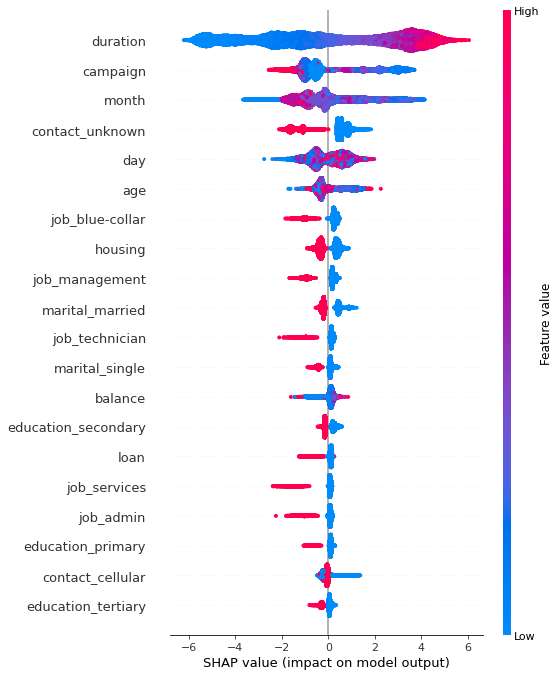

In [39]:
shap.summary_plot(shap_values, features=X_smote, feature_names=X_smote.columns)

Summary:
1. Catboost model yeilded an accuracy of 93% on the test set. 

    


 2. From the data visualization we can conclude that the customers who are most
likely to subscribe the term deposit have the following characteristics:

    *   who have a job among three job title namely blue-collar, management and technician
    *   who have an secondary level eductaion 
    *   who are within the age being in between 30 to 44 years 
    *   who have a balance within 15000. 
    *   who were contacted for 2-5 times for the compaigning.
    *   who were conatcted in the month of May or July or April.

3. The most important features are these four features that makes the customers buy the service:
  - Campaign
  - Month
  - Duration
  - Age